Davide Pasetto - 

Deborah Aloisi - 249948

# Exercise 1


In wireless communications, the Rayleigh pdf is typically used to model the small-scale statistical fluctuations that affect the amplitude gain of non-line-of-sight (NLoS) radio propagation paths:
fRayl(x) = x exp− x2  , (1) σ2 2σ2
whereas the Rice distribution models the statistical fluctuations of line-of-sight (LoS) channels:
fRice(x)= xexp−x2+ν2I0xν. (2)
In (2), I0(x) is the modified Bessel function of the first kind and order 0. There exist utilities that implement I0(·) in most programming languages, e.g., check besseli in Matlab/Octave or scipy.i0 in Python, or besselI in R.
Use rejection sampling to draw from the Rayleigh distribution for σ = 1, and from the Rice distribution for σ = 2 and ν = 2. (Hint: use an exponential pdf as a bounding function.)
In both cases, compute the average number of trials required to draw a variate. For the Rice case, is it more convenient to just increase the saling factor or also to change the mean of the bounding exponential pdf?
Facultative: in the Rayleigh case, find the optimal scaling factor that you need to apply to the exponential pdf in order to minimize the number of attempts before a random variate draw is accepted.


In [1]:
import numpy as np
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt
import math

o_nlos=1
o_los=2
v_los=2

def nlos(x):
    return (x/o_nlos**2)*np.exp(-x**2/(2*o_nlos**2))

def los(x, I):
    return (x/o_los**2)*np.exp(-(x**2+v_los**2)/(2*o_los**2))*I*(x*v_los/o_los**2)



---

# Exercise 2



## 1
 Let us start from the scenario. Throw wireless terminals at random in a square of 10 m × 10 m, in such a way that the density of the terminals is minimum along any of the 2 diagonals, and progressively increasing towards the four sides. (Hint: follow the indications on slides 66-67 of the module on RNGs and modify the method to suit your needs.) The result should be like in the figure below.

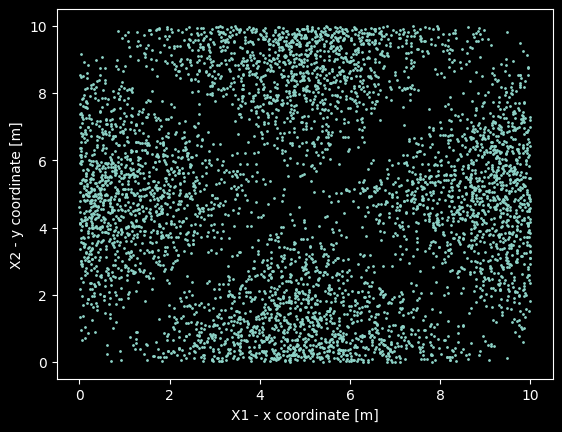

In [91]:
import matplotlib.pyplot as plt
import random

def sample_vector():
    while True:
        x1 = random.uniform(0, 10)
        x2 = random.uniform(0, 10)
        u = random.uniform(0, 10)
        if u <= abs((-1)*x1 +10 - x2):
            if u <= abs(x1-x2):
                break
    return (x1, x2)

num_samples = 5000
samples = [sample_vector() for n in range(num_samples)]

# Plot the samples
plt.scatter([x[0] for x in samples], [x[1] for x in samples], s=1)
plt.xlabel('X1 - x coordinate [m]')
plt.ylabel('X2 - y coordinate [m]')
plt.show()

## 2

Take pairs of 2 terminals at random, let one of them be the “transmitter” (TX) and the other be the “receiver” (RX). Compute the Signal-to-Noise Ratio (SNR) γ as follows:
P ·d−2
γ=tx tx,rx, (3)
N
where Ptx = 0.1 Watt (or equivalently, 20 dBm), N = 1.6 · 10−4 Watt, and dtx,rx is the distance between the TX and the RX. Assuming that a transmission is correctly received whenever γ > 8 (or 6 dB), find the probability of success of a transmission and give a 95% confidence interval for the probability of success. You will probably need to repeat your simulation for several different draws of the scenario. However, you definitely can draw multiple pairs from the same scenario before changing to a new one.

In [7]:
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Constants
P_tx = 0.1  
N = 1.6e-4  
num_samples = 1000 
num_trials = 1000  # number of trials
num_pairs = 100  # number of pairs per trial

def compute_distance(point1, point2):
    return np.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

def compute_snr(d_tx_rx):
    return (P_tx / (N * d_tx_rx**2))

def simulate_trial():
    success_count = 0
    for n in range(num_pairs):
        tx_index = random.randint(0, num_samples-1)
        rx_index = random.randint(0, num_samples-1)
        while rx_index == tx_index:
            rx_index = random.randint(0, num_samples-1)
        d_tx_rx = compute_distance(samples[tx_index], samples[rx_index])
        snr = compute_snr(d_tx_rx)
        if snr > 8:
            success_count += 1
    return success_count / num_pairs

def sample_vector():
    while True:
        x1 = random.uniform(0, 10)
        x2 = random.uniform(0, 10)
        u = random.uniform(0, 10)
        if u <= abs((-1)*x1 +10 - x2):
            if u <= abs(x1-x2):
                break
    return (x1, x2)


samples = [sample_vector() for n in range(num_samples)]


success_probabilities = []
for n in range(num_trials):
    trial = simulate_trial()
    success_probabilities.append(trial)

success_probability = np.mean(success_probabilities)
confidence_interval = np.percentile(success_probabilities, [2.5, 97.5])
print(f"Success probability: {success_probability:.4f}")
print(f"95% confidence interval: [{confidence_interval[0]:.4f}, {confidence_interval[1]:.4f}]")


Success probability: 0.9107
95% confidence interval: [0.8500, 0.9600]


## 3

 Now consider a case with interference. After drawing the terminals, take them in 3-tuples, let the first of each tuple be the TX, the second be the RX, and the third be an interfering TX. The SNR now should take interference into consideration, so consider this modified formula for the signal-to-noise-and-interference ratio (SINR):
P ·d−2
γI = tx tx−rx , (4)
N +Ptx ·d−2 txI,rx
where dtxI,rx is the distance between the interfering transmitter and the receiver. Compute the probability of success of a transmission in this case and give a 95% confidence interval. Check a few cases where the transmission is successful: what do you observe?

In [103]:
import random
import matplotlib.pyplot as plt
import numpy as np

# Constants
P_tx = 0.1  
N = 1.6e-4  
num_samples = 1000 
num_trials = 1000  # number of trials
num_pairs = 100  # number of pairs per trial

def compute_distance(point1, point2):
    return np.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

def compute_sinr(d_tx_rx, d_txI_rx):
    return ((P_tx*d_tx_rx**(-2)) / (N + P_tx*d_txI_rx**(-2)))

def simulate_trial():
    success_count = 0
    for n in range(num_pairs):
        tx_index = random.randint(0, num_samples-1)
        rx_index = random.randint(0, num_samples-1)
        txI_index = random.randint(0, num_samples-1)
        while rx_index == tx_index or txI_index == tx_index or rx_index == txI_index:
            rx_index = random.randint(0, num_samples-1)
            txI_index = random.randint(0, num_samples-1)
        d_tx_rx = compute_distance(samples[tx_index], samples[rx_index])
        d_txI_rx = compute_distance(samples[tx_index], samples[txI_index])
        snr = compute_sinr(d_tx_rx, d_txI_rx)
        if snr > 8:
            success_count += 1
    return success_count / num_pairs

def sample_vector():
    while True:
        x1 = random.uniform(0, 10)
        x2 = random.uniform(0, 10)
        u = random.uniform(0, 10)
        if u <= abs((-1)*x1 +10 - x2):
            if u <= abs(x1-x2):
                break
    return (x1, x2)


samples = [sample_vector() for n in range(num_samples)]


success_probabilities = []
for n in range(num_trials):
    trial = simulate_trial()
    success_probabilities.append(trial)

success_probability = np.mean(success_probabilities)
confidence_interval = np.percentile(success_probabilities, [2.5, 97.5])
print(f"Success probability: {success_probability:.4f}")
print(f"95% confidence interval: [{confidence_interval[0]:.4f}, {confidence_interval[1]:.4f}]")

Success probability: 0.1062
95% confidence interval: [0.0500, 0.1700]


## 4

Repeat points 2 and 3 for a case with fading affecting each transmission. For the case of the SNR, the
new formula to consider is:
where ξtx is an exponentially distributed random variable of mean 1/λ = 1. For the case of the SINR, the
new formula to consider is:
be drawn anew for each transmission. Do you observe any differences?
P ξ ·d−2
γfad = tx tx tx,rx , (5)
N
P ξ ·d−2
γI= tx tx tx−rx , (6) N + PtxξI · d−2
txI,rx
where ξtx and ξI are independent exponentially distributed randoms variable of mean 1/λ = 1, that

In [98]:
import random
import numpy as np

# Constants
P_tx = 0.1  
N = 1.6e-4  
num_samples = 1000 
num_sample_exp = 1000
num_trials = 1000  # number of trials
num_pairs = 100  # number of pairs per trial


# expoenntial variable ξtx
e_mean = 1# 1/lambda
def sample_exponential(mean):
    return -mean * np.log(1 - random.random())

exp_samples = [sample_exponential(e_mean) for n in range(num_sample_exp)]
e_tx_index = random.randint(0, num_sample_exp-1)
e_txI_index = random.randint(0, num_sample_exp-1)
while e_txI_index == e_tx_index:
            e_txI_index = random.randint(0, num_sample_exp-1)
e_tx = exp_samples[e_tx_index]
e_I = exp_samples[e_txI_index]




def compute_distance(point1, point2):
    return np.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

def compute_snr_f(d_tx_rx):
    return (P_tx * e_tx/ (N * d_tx_rx**2))

def compute_sinr_f(d_tx_rx, d_txI_rx):
    return ((P_tx*e_tx*d_tx_rx**(-2)) / (N + P_tx*e_I*d_txI_rx**(-2)))


def simulate_trial_snr_f():
    success_count = 0
    for n in range(num_pairs):
        tx_index = random.randint(0, num_samples-1)
        rx_index = random.randint(0, num_samples-1)
        while rx_index == tx_index:
            rx_index = random.randint(0, num_samples-1)
        d_tx_rx = compute_distance(samples[tx_index], samples[rx_index])
        snr = compute_snr_f(d_tx_rx)
        if snr > 8:
            success_count += 1
    return success_count / num_pairs

def simulate_trial_sinr_f():
    success_count = 0
    for n in range(num_pairs):
        tx_index = random.randint(0, num_samples-1)
        rx_index = random.randint(0, num_samples-1)
        txI_index = random.randint(0, num_samples-1)
        while rx_index == tx_index or txI_index == tx_index or rx_index == txI_index:
            rx_index = random.randint(0, num_samples-1)
            txI_index = random.randint(0, num_samples-1)
        d_tx_rx = compute_distance(samples[tx_index], samples[rx_index])
        d_txI_rx = compute_distance(samples[tx_index], samples[txI_index])
        snr = compute_sinr_f(d_tx_rx, d_txI_rx)
        if snr > 8:
            success_count += 1
    return success_count / num_pairs

def sample_vector():
    while True:
        x1 = random.uniform(0, 10)
        x2 = random.uniform(0, 10)
        u = random.uniform(0, 10)
        if u <= abs((-1)*x1 +10 - x2):
            if u <= abs(x1-x2):
                break
    return (x1, x2)


samples = [sample_vector() for n in range(num_samples)]


success_probabilities_snr = []
for n in range(num_trials):
    trial = simulate_trial_snr_f()
    success_probabilities_snr.append(trial)

success_probability_snr = np.mean(success_probabilities_snr)
confidence_interval_snr = np.percentile(success_probabilities_snr, [2.5, 97.5])
print(f"SNR:Success probability: {success_probability_snr:.4f}")
print(f"SNR:95% confidence interval: [{confidence_interval_snr[0]:.4f}, {confidence_interval_snr[1]:.4f}]")


success_probabilities_sinr = []
for n in range(num_trials):
    trial = simulate_trial_snr_f()
    success_probabilities_sinr.append(trial)

success_probability_sinr = np.mean(success_probabilities_sinr)
confidence_interval_sinr = np.percentile(success_probabilities_sinr, [2.5, 97.5])
print(f"SINR:Success probability: {success_probability_sinr:.4f}")
print(f"SINR:95% confidence interval: [{confidence_interval_sinr[0]:.4f}, {confidence_interval_sinr[1]:.4f}]")

SNR:Success probability: 0.3453
SNR:95% confidence interval: [0.2500, 0.4402]
SINR:Success probability: 0.3439
SINR:95% confidence interval: [0.2600, 0.4302]





----------------------------